In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
from tensorflow import keras
import os

In [2]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory('./Soil types',target_size=(200,200),batch_size=batch_size,classes =['Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],class_mode = 'categorical')



Found 156 images belonging to 5 classes.


In [5]:
for image_batch,label_batch in train_generator:
    break 

print(image_batch.shape,label_batch.shape)

(10, 200, 200, 3) (10, 5)


In [6]:
print(train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [7]:
model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [10]:
total_sample = train_generator.n
n_epochs = 30

In [11]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 3s 150ms/step - loss: 1.6239 - acc: 0.1849
Epoch 2/30
15/15 [==============================] - 2s 150ms/step - loss: 1.4858 - acc: 0.2808
Epoch 3/30
15/15 [==============================] - 2s 162ms/step - loss: 1.1948 - acc: 0.4247
Epoch 4/30
15/15 [==============================] - 2s 153ms/step - loss: 1.0591 - acc: 0.4452
Epoch 5/30
15/15 [==============================] - 2s 144ms/step - loss: 1.0212 - acc: 0.4315
Epoch 6/30
15/15 [==============================] - 2s 157ms/step - loss: 1.0654 - acc: 0.4384
Epoch 7/30
15/15 [==============================] - 2s 150ms/step - loss: 1.0519 - acc: 0.3836
Epoch 8/30
15/15 [==============================] - 2s 140ms/step - loss: 1.0384 - acc: 0.4795
Epoch 9/30
15/15 [==============================] - 2s 149ms/step - loss: 0.9786 - acc: 0.5205
Epoch 10/30
15/15 [==============================] - 2s 149ms/step - loss: 0.8807 - acc: 0.5068
Epoch 11/30
15/15 [==============================

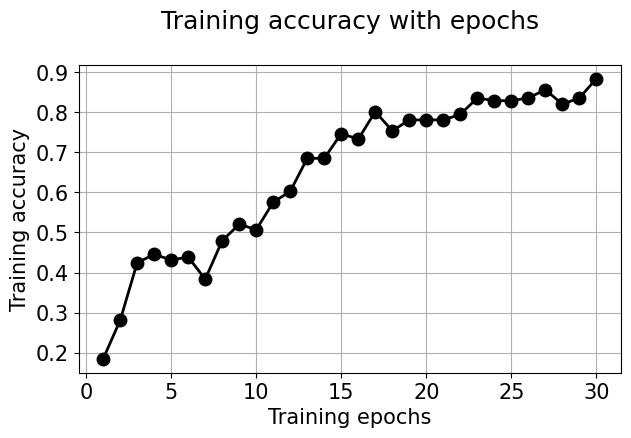

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
model.save('my_model.h5')

In [14]:
model.save(filepath="save_model/")

INFO:tensorflow:Assets written to: save_model/assets


INFO:tensorflow:Assets written to: save_model/assets
